<a href="https://colab.research.google.com/github/Amandaheloise/MVP-Machine-Learning/blob/main/Previs%C3%A3o_de_Pre%C3%A7os_por_Habita%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Previsão de Preços Por Habitação

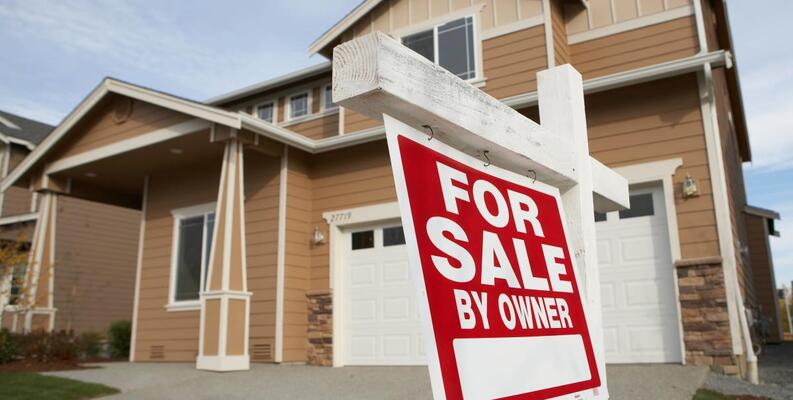

# Introdução

###Definição do Problema:
O mercado Imobiliário possui uma grande variedade de preços, gostos de tamanhos de casas e tipos.Devido a isso, saber se o preço de uma casa é justo ao que ela oferece é uma forma de economizar o dinheiro e não acabar adquirindo uma casa supervalorizada.

###Objetivo:
Esse projeto envolve prever o preço de propriedades imobiliárias com base em vários recursos que influenciam o valor de uma propriedade. O conjunto de dados contém vários atributos de propriedades imobiliárias, como metragem quadrada, número de quartos, banheiros, andares, ano em que a propriedade foi construída, se a propriedade tem jardim ou piscina, tamanho da garagem, pontuação de localização e distância do centro da cidade.

O objetivo é construir um modelo de regressão que possa prever o preço de um imóvel com base nas características fornecidas.

###Descrição do Problema:
A principal dificuldade em prever o valor está no modelo ser capaz de aprender a relação entre esses recuros e o preço, fornecendo uma previsão precisa para dados não vistos

###Tipo de Problema
Este é um problema de Regressão, onde o modelo aprenderá a associar os atributos

###Premissas e Hipóteses:

Premissa: As caracteristicas de um imovel determinam seu preço de mercado, devido ao beneficio que adqurido pelo consumidor. Ex: Casas maiores tendem a ser mais caras.

Hipótese: O modelo de machine Learning deve selecionar variaveis com maior correlação com o preço do imovel, melhorando a precisão das previsões. Ex casa com mis banheiros tendem a ser maiores e mais caras.
Restrições e Condições:

Restrição: Os dados utilizados para treinar o modelo foram obtidos a partir do Kaggle não sendo informado ano de aquisição e periodo, podendo insidir fatores como alta e baixas do mercado imobiliário.

Condição: O modelo será aplicado apenas para os dados do banco extraido.
Os dados foram selecionados para incluir as variáveis com maior correlação positiva com a variável alvo.
A combinação dessas variáveis foi utilizada como uma nova feature para melhorar a capacidade preditiva.


###Descrição do dataset:
O Dataset é composto por atributos de propriedades imabiliárias como Ano em que foi contruído, número de quartos e banheiros, número de andares se tem garagem piscina ou jardim. Que descrevem com detalhes o imovel, esses atributos são os msmos levados em consideração pelo cliente na hora da aquisição ou em vistorias de precisificação do imovel para definição de impostos.

Estrutura do projeto:
1. Pré-processamento de dados:

2. Análise da Distribuição dos Dados:

3. Separação em conjunto de treino e teste:

4. Porcessamento dos Dados:

5. Resultados:

# Pré-Processamento de Dados:

##Importar as Bibliotecas



In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários para problemas de regressão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


##Carregar Dados

Os dados foram obitidos atravez da plataforma Kaggle com nome de Regressão dos preços da habitação.
Segue link do documento. https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression/data

Abaixo está a descrição das colunas do conjunto de dados.

*   ID : Um identificador exclusivo para cada propriedade.
*   Square_Feet : A área da propriedade em metros quadrados.
* Num_Bedrooms : O número de quartos na propriedade.
* Num_Bathrooms : O número de banheiros na propriedade.
* Num_Floors : O número de andares da propriedade.
* Ano_Construído : O ano em que a propriedade foi construída.
* Has_Garden : Indica se a propriedade tem um jardim (1 para sim, 0 para não).
* Has_Pool : indica se a propriedade tem um pool (1 para sim, 0 para não).
* Garage_Size : O tamanho da garagem em metros quadrados.
* Location_Score : Uma pontuação de 0 a 10 que indica a qualidade do bairro (pontuações mais altas indicam bairros melhores).
* Distance_to_Center : A distância da propriedade até o centro da cidade em quilômetros.
* Preço : A variável alvo que representa o preço da propriedade. Este é o valor que pretendemos prever.


In [4]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Amandaheloise/MVP-Machine-Learning/refs/heads/main/real_estate_dataset.csv"
# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')
# Mostra as primeiras linhas do dataset
print(dataset.head())


   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
3           0         0           17        2.070949            8.284019   
4           1         0           34        1.523278           14.648277   

           Price  
0  602134.816747  
1  591425.135386  
2  464478.696880  
3  583105.655996

###Caracteristicas dos Dados

In [5]:
dataset.shape

(500, 12)

In [6]:
dataset.dtypes

,0
ID,int64
Square_Feet,float64
Num_Bedrooms,int64
Num_Bathrooms,int64
Num_Floors,int64
Year_Built,int64
Has_Garden,int64
Has_Pool,int64
Garage_Size,int64
Location_Score,float64


In [7]:
dataset.isnull().sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


O DAtaset possui 500 registros em doze atributos, com valores inteiros e fracionários sem presença de valores nulos.

#Análise da Distribuição dos Dados


Para visualizar melhor como estão distribuidos os dados a seguir serão plotados os histogramas.

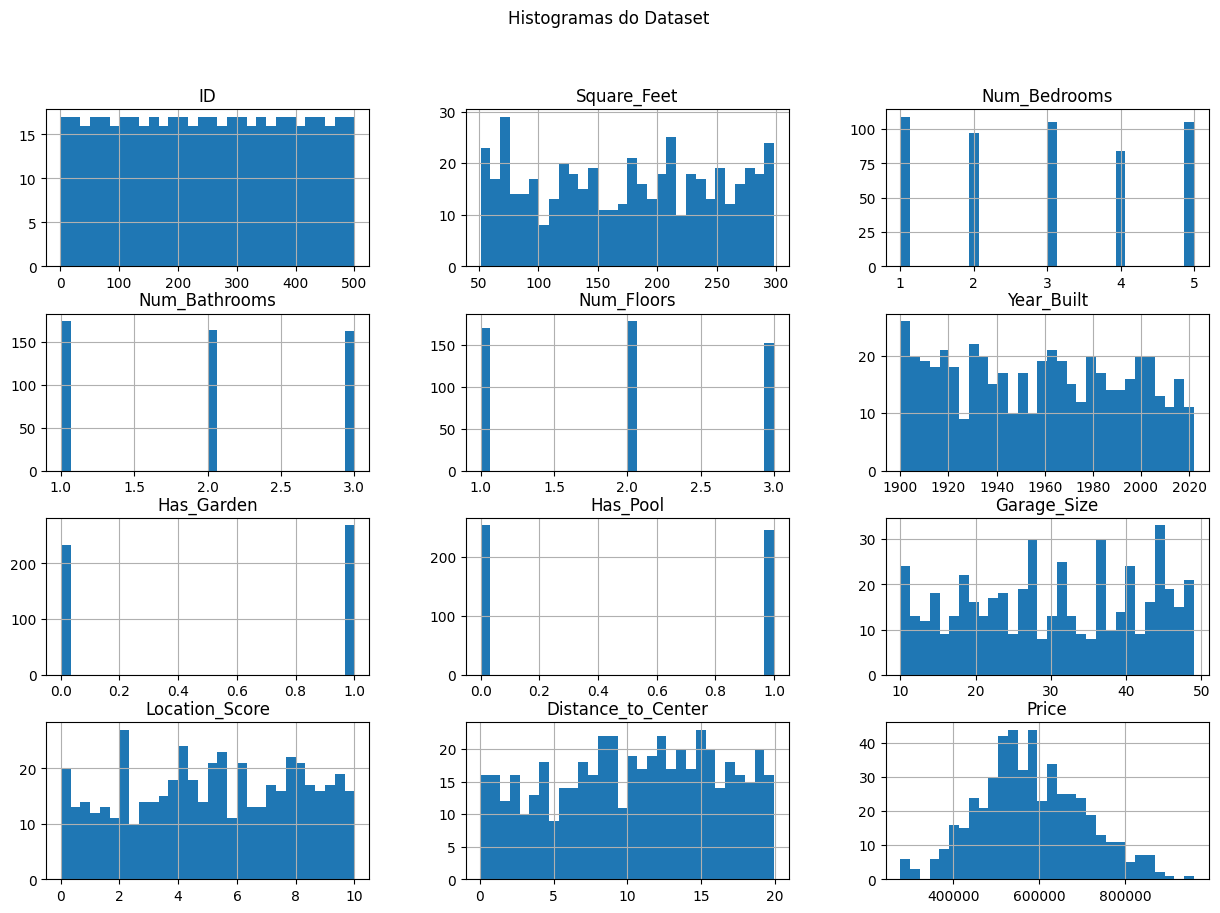

In [8]:
# Plotar histograma
dataset.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramas do Dataset')
plt.show()

A seguir iremos observar os gráficos de Disperssão para verificar as relações entre pared de atributos.**negrito**

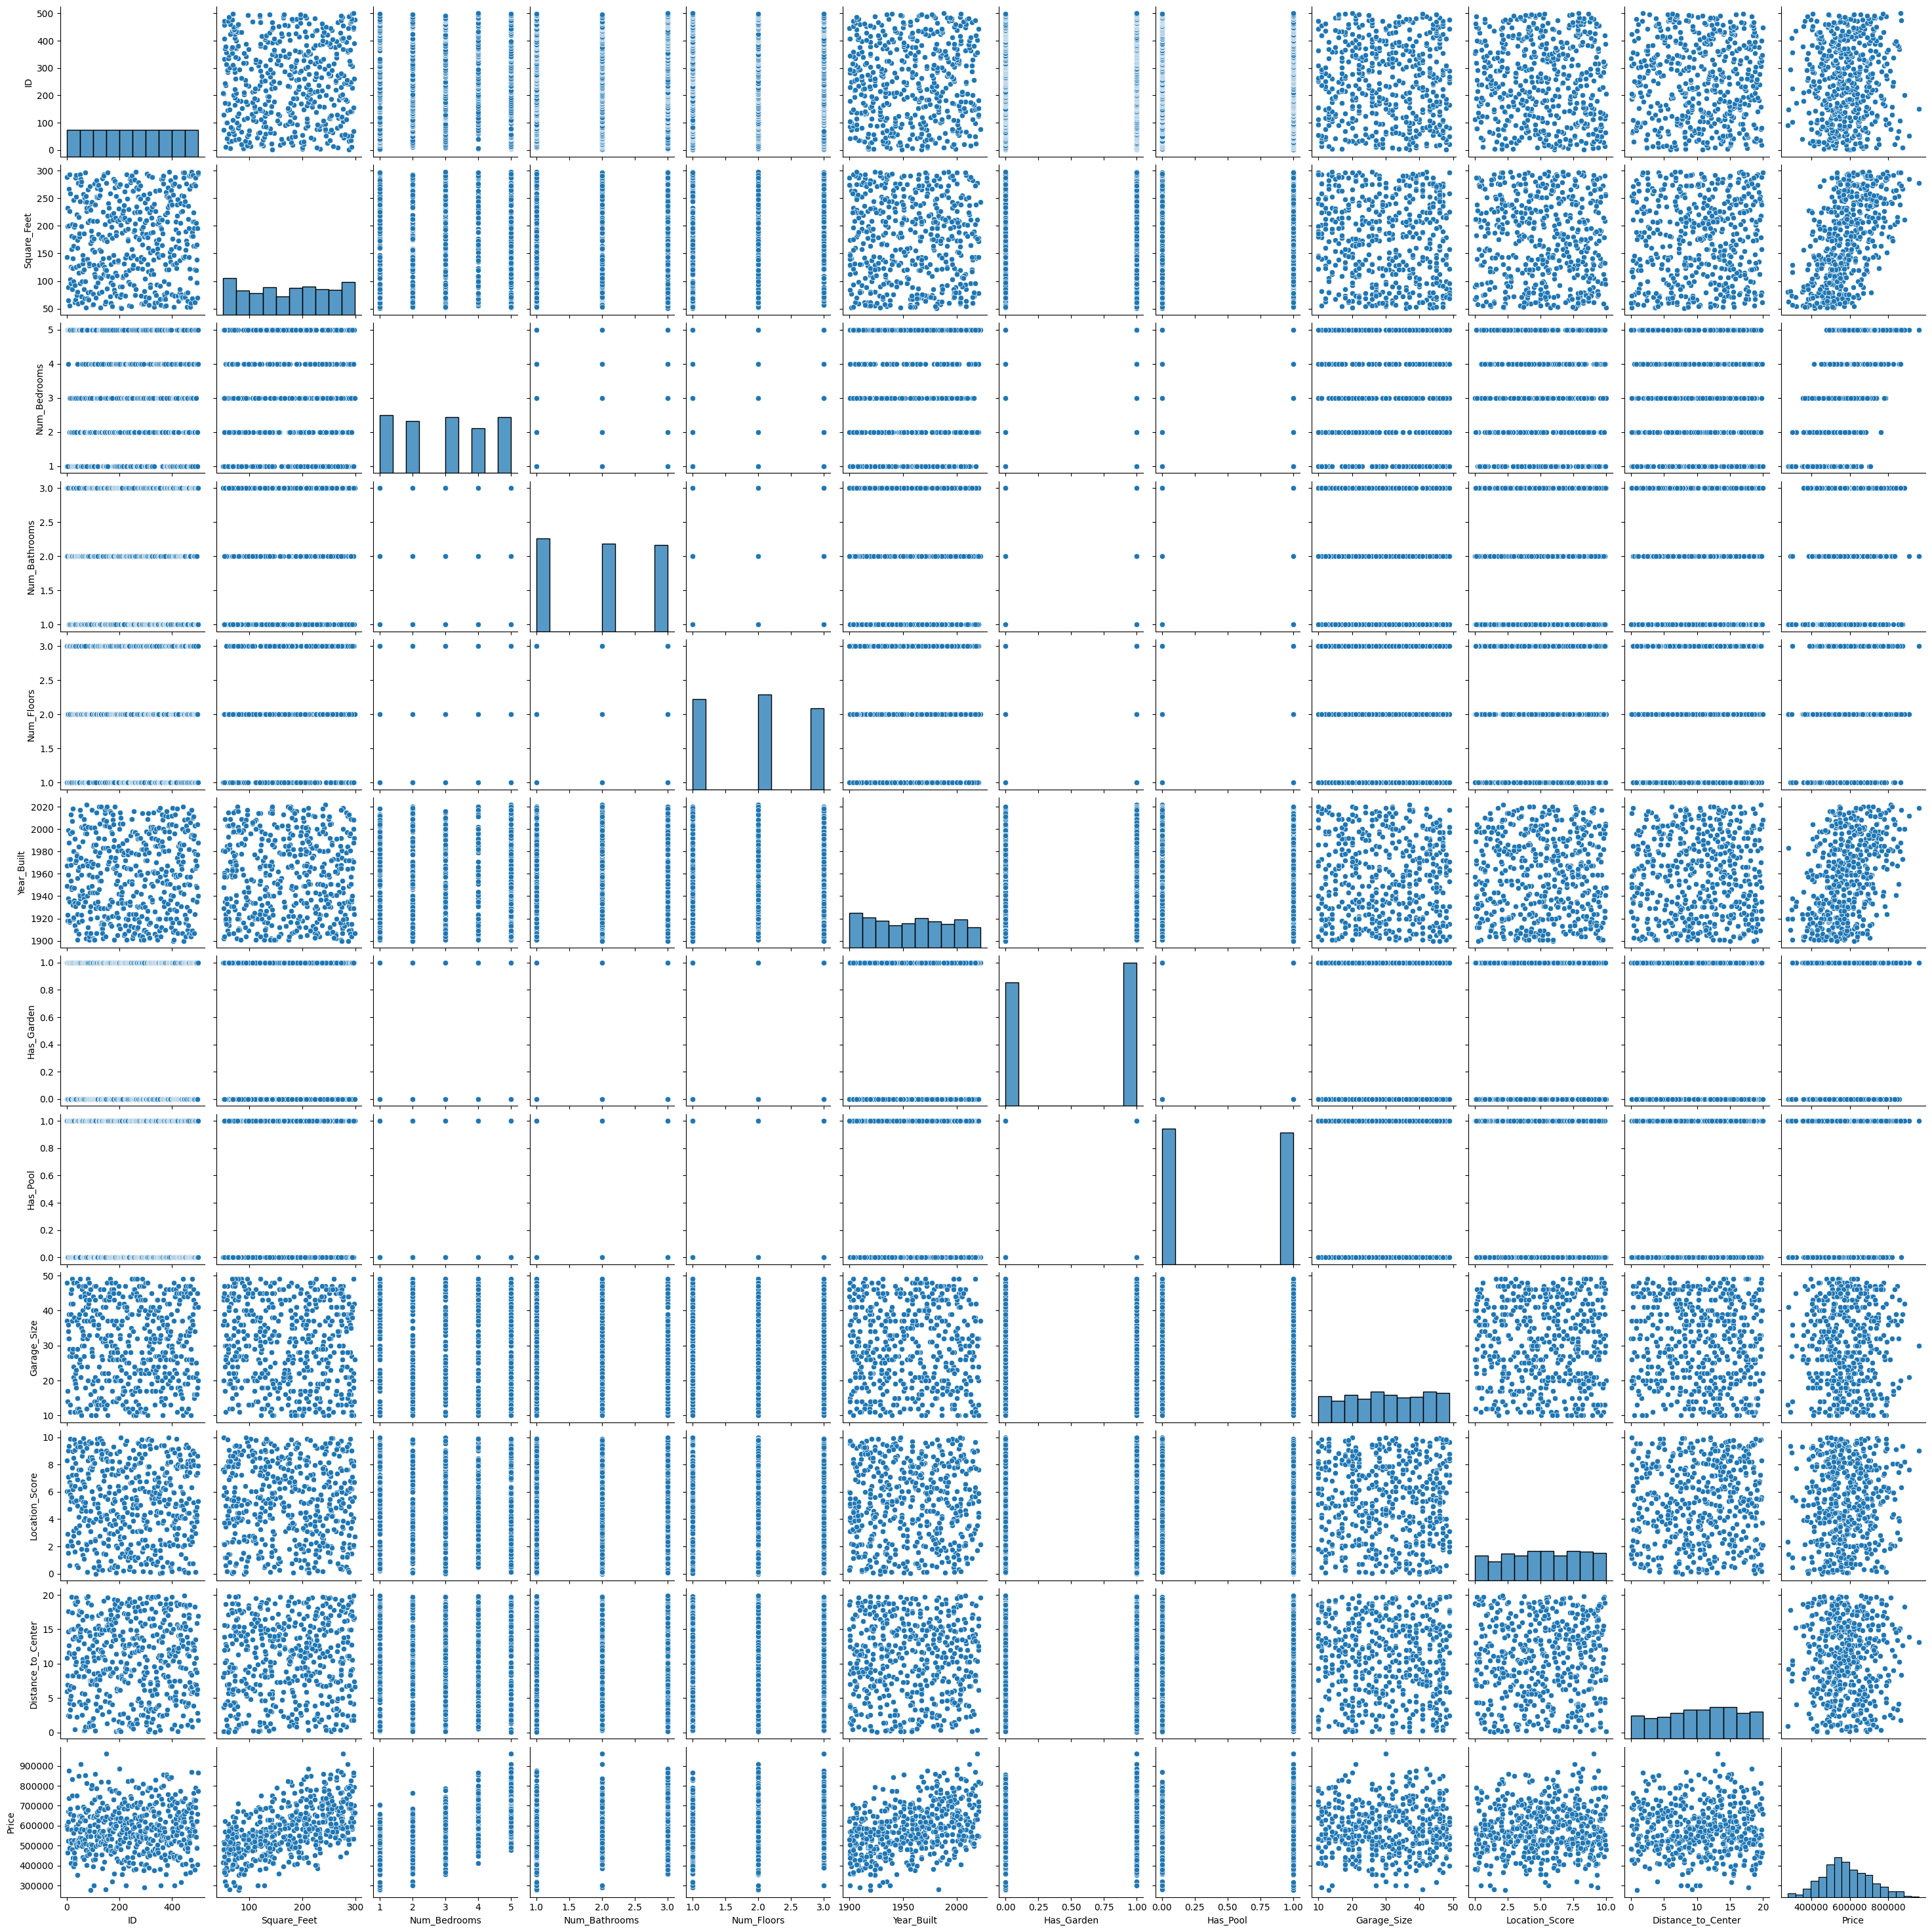

In [9]:
# Parâmetros do gráfico de dispersão
sns.pairplot(dataset)
plt.show()

Analisando a matriz de dispersão, os gráficos que mostram a relação mais forte e linear São os de Numero de banheiros, quartos e número de andares. Estes gráficos apresentam uma forte correlação positiva, indicando que à medida que o valor do atributo aumenta, o preço também tende a aumentar de maneira consistente.

In [10]:
# Adicionando Feature Engineering
# Identificar variáveis com maior correlação
correlation_matrix = dataset.corr()
print(correlation_matrix)

                          ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  \
ID                  1.000000     0.051102      0.014511       0.027395   
Square_Feet         0.051102     1.000000     -0.049918      -0.001667   
Num_Bedrooms        0.014511    -0.049918      1.000000      -0.056808   
Num_Bathrooms       0.027395    -0.001667     -0.056808       1.000000   
Num_Floors         -0.006343     0.056873      0.009088      -0.040895   
Year_Built          0.028548    -0.055062      0.031806      -0.013407   
Has_Garden         -0.005307    -0.000978      0.017429      -0.037040   
Has_Pool           -0.076580     0.007530      0.012039      -0.024880   
Garage_Size        -0.000137    -0.051598     -0.065481       0.055707   
Location_Score     -0.045071    -0.035270     -0.000357      -0.013855   
Distance_to_Center -0.006751     0.093080      0.040511      -0.082571   
Price               0.031774     0.558604      0.563973       0.156689   

                    Num_Floors  Year_

Atraves da Matriz de Correlação é possivel observar que os valores de maior correleção positiva são de àrea do terreno(Square Fit) e os de número de quartos(Num_Bedrooms).

Agora iremos selecionar a duas variáveis de maior correlação.


In [11]:
# Selecionar duas variáveis com maior correlação positiva
highest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
highest_corr = highest_corr[highest_corr < 1].idxmax()
print(f'A Maior correlação positiva ocorre entre: {highest_corr[0]} e {highest_corr[1]}')

A Maior correlação positiva ocorre entre: Price e Num_Bedrooms


Ou seja quanto mais quartos maior será o valor do Imóvel.

Vamos criar uma nova feature(combined_feature) multiplicando as duas variáveis de maior correlação e em seguida será plotado no gráfico de dispersão para a nova feature contra a variável alvo.

   combined_feature
0      6.021348e+05
1      5.914251e+05
2      4.644787e+05
3      2.915528e+06
4      2.479517e+06


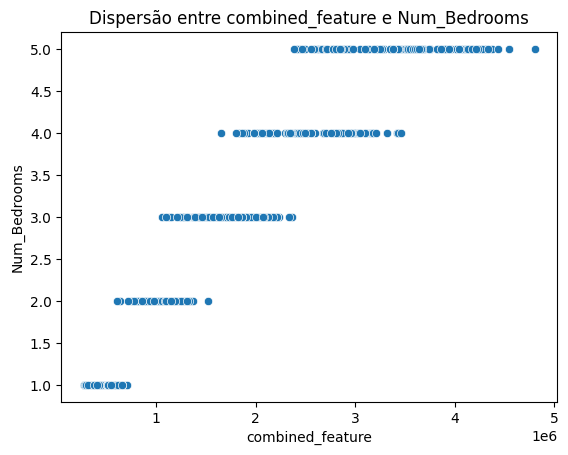

In [12]:
# Criar nova feature baseada nessas variáveis
dataset['combined_feature'] = dataset[highest_corr[0]] * dataset[highest_corr[1]]
print(dataset[['combined_feature']].head())

# Plotar nova feature contra a variável alvo
sns.scatterplot(x=dataset['combined_feature'], y=dataset[highest_corr[1]])
plt.title(f'Dispersão entre combined_feature e {highest_corr[1]}')
plt.xlabel('combined_feature')
plt.ylabel(highest_corr[1])
plt.show()

Com isso adicionamos uma Feature Engineering ao pipeline e permite explorar novas combinações para melhorar o desempenho do modelo.

# Separação em conjuntos de treino e teste

Os dados foram separados em 20% treino para teste e 80% parateste.

In [13]:
# Separação em conjuntos de treino e teste
X = dataset[['combined_feature']]
y = dataset[highest_corr[1]]
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed)

#Processamento dos Dados

A seguir serão criadas pipelines para que as estapas de pré processamento sejam incorporadas no processo de validação cruzada, evitando vazamento de dados.

A padronização dos dados(StandardScaler) foi utilizada para garantir que todas as features tenham média zero e variância igual a 1, garantindo o desempenho do algoritmo.

In [14]:
# Função para criar pipelines
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),  # Pré-processamento: padronização dos dados
        ('model', model)  # Modelo de machine learning
    ])

OBS: Não foi feito nenhum ajuste inial dos hiperparâmetros, posterirmente eles serão avaliados utilizando o GridSearchCV.

Em seguida são carregados os modelos de Regressão para a escolha  do que melhor se aplica aos dados.
Os modelos mais indicados para problemas de regressão são os:

* K-Nearest Neighbors (KNN): Escolhido por seu bom desempenho em problemas de regressão e capacidade de capturar relações não lineares.

* Linear Regression: Usado como baseline por sua simplicidade e interpretabilidade.

* Random Forest e Gradient Boosting: Escolhidos por sua robustez e capacidade de melhorar o desempenho com técnicas de ensemble.

In [15]:
# Modelos de Regressão para treinar
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

Foi utilizado o processo de validação cruzada para garantir que o modelo generalize bem e não esteja sobreajustustado as dados de treino.

In [16]:
#Avaliação dos modelos com validação cruzada
results = []
names = []
for name, model in models:
    pipeline = create_pipeline(model)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean Squared Error (Cross-Validation): {-cv_results.mean()}')


Linear Regression: Mean Squared Error (Cross-Validation): 0.22724973649313887
Decision Tree: Mean Squared Error (Cross-Validation): 0.25
K-Nearest Neighbors: Mean Squared Error (Cross-Validation): 0.1555
Random Forest: Mean Squared Error (Cross-Validation): 0.18729325000000002
Gradient Boosting: Mean Squared Error (Cross-Validation): 0.1583191853851078


Para selecionar o melhor modelo será utilizado o metodo do MSE(Erro quadrático médio).O MSE fornece uma medida de quão próximas as previsões estão dos valores reais, com valores mais baixos indicando melhor desempenho.

Com base nos valores de Mean Squared Error (MSE) para validação cruzada fornecidos, o melhor modelo para os seus dados é o K-Nearest Neighbors (KNN), que obteve o menor MSE de 0.1555.

Gradient Boosting: Com um MSE de 0.1583, também é um candidato forte, mas ligeiramente pior do que KNN.

# Resultados


In [17]:
best_model = create_pipeline(KNeighborsRegressor())
best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (Train): {train_mse}')
print(f'Mean Squared Error (Test): {test_mse}')

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_results = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_results.mean()}')



Mean Squared Error (Train): 0.0992
Mean Squared Error (Test): 0.1348
Cross-Validation MSE: 0.1555


##Otimização dos Hiperparâmetros

Pode-se utilizar o hiperparâmetro n_neighbors para do algoritimo K=Neareste Neighbors para determnar o número de visinhos mais próximos para fazer a previsão.

In [18]:
param_grid = {'model__n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(create_pipeline(KNeighborsRegressor()), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'model__n_neighbors': 9}


Foi observado que entre os valores testados 9 foi o que melhores resultados, ou seja, o menor MSE durante a validação cruzada.

Após o resulados é possivel observar que o MSE no conjunto de treino é menor que no conjunto de teste. No entanto, como a diferença não é grande indica que o modelo não está sofrendo overfitting grave e está generalizando bem.

Já o MSE da validação cruzada é um pouco maior aos dados de treino teste, mas com resultado ainda satisfatório para modelo, indicando que o KNN está se ajustando bem aos dados.

Como pontos que podem ser melhorados no modelo, pode-se utilizar posteriormente os metodos de Gradiente Boosting e Random Forest, pois são métodos conhecidos por lidar com dados compexos e melhor o desempenho. Técnicas como Ensables  podem ser utilizadas também para combinar diferntes modelos e melhorar a perfomance geral(ex: Bagging e Stacking)